In [28]:
# Program to parse, and display info from Picuris Bison migration data set
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [29]:
states = gpd.read_file('us-map/usa-states-census-2014.shp')
type(states)

geopandas.geodataframe.GeoDataFrame

In [30]:
states = states.to_crs("EPSG:4326")
southwest = states[states['STUSPS'].isin(['NM','UT','CO','AZ','KS', 'TX', 'OK'])]


In [31]:
# Read in original data set
original_df = pd.read_excel('./bison_presence_dataset.xlsx')
# print(original_df.columns) 

# Create new data set keeping only the specified columns
df_with_columns = original_df[['longitude','latitude', 'year', 'Country', 'OID', 'States.Provinces', 'Reference_number']]
# print(df)

states = [
    "New Mexico",
    "Utah",
    "Colorado",
    "Arizona",
    "Kansas",
    "Texas",
    "Oklahoma",
]
# Trim rows that are not from the states we want
df_filtered = df_with_columns[(df_with_columns['States.Provinces']).isin(states)]
print(len(df_filtered))

1586


<Axes: >

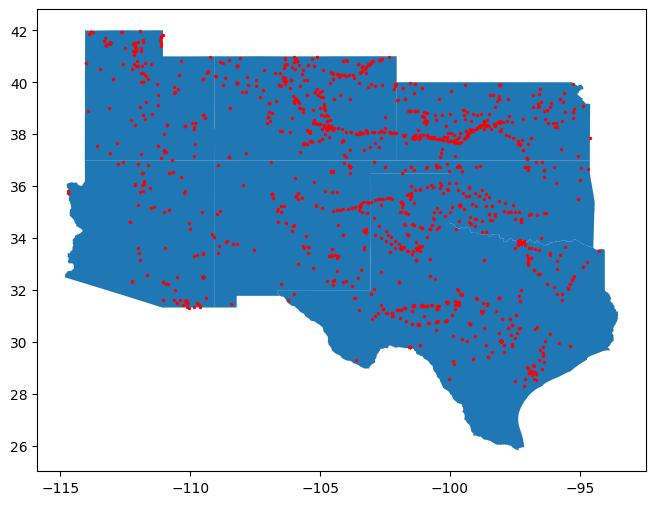

In [32]:
# southwest.plot(cmap='tab10', figsize=(14, 12))
geometry = [Point(xy) for xy in zip(df_filtered['longitude'], df_filtered['latitude'])]
gdf = GeoDataFrame(df_filtered, geometry=geometry)   

gdf.plot(ax=southwest.plot(figsize=(10, 6)), marker='o', color='red', markersize=2)